In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 実行コード

(512, 1)
Original Wave Shape: (1, 512)


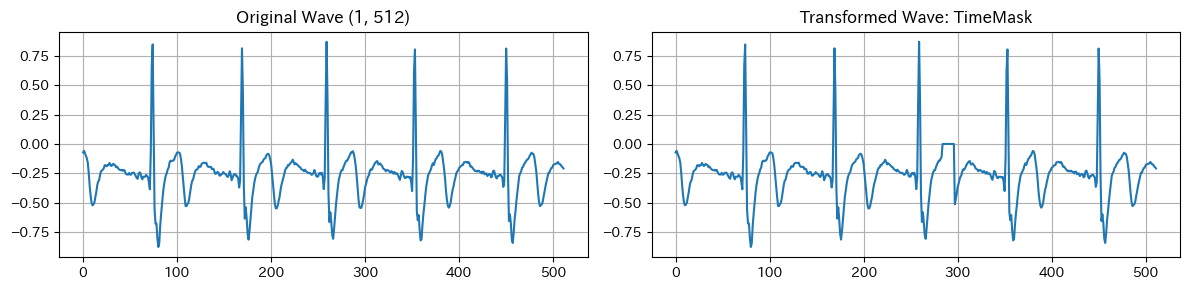

In [27]:
# データ処理
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import audiomentations as A

def show_wave_transform(wave_path: str, transform):
    """
    音声・波形データを読み込み、指定されたデータ変換を適用して比較する関数。

    Args:
        wave_path (str): 音声ファイルのパス（NumPyファイル）。
        transform: audiomentationsの変換オブジェクト。

    Examples:
        wave_path = "/path/to/your/wave.npy"
        transform = A.TimeMask(
            min_band_part=0.1,
            max_band_part=0.15,
            fade=True,
            p=1.0,
        )
        show_wave_transform(wave_path, transform)
    Notes:
        Documents: https://iver56.github.io/audiomentations/
    """

    data = np.load(wave_path)
    print(data.shape)
    # 512 -> (1, 512)
    data = data.reshape(1, -1)

    print(f"Original Wave Shape: {data.shape}")

    # 変換を適用
    transformed_data = transform(samples = data, sample_rate=128)

    # 元の画像と変換後の画像を並べて表示
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    axes[0].plot(data.reshape(-1))
    axes[0].set_title(f"Original Wave {data.shape}")
    axes[0].grid(True)

    axes[1].plot(transformed_data.reshape(-1))
    axes[1].set_title(f"Transformed Wave: {transform.__class__.__name__}")
    axes[1].grid(True)

    # 両方の画像を表示
    plt.tight_layout()
    plt.show()


wave_path = '/content/drive/MyDrive/MatsuoLab/SLab/data/preprocessed_all_data/ecg_1_stable_13312.npy'

# データ拡張のパイプラインを定義
transform = A.TimeMask(
    min_band_part=0.01,
    max_band_part=0.05,
    fade=True,
    p=1.0,
    )

# データ拡張の可視化
show_wave_transform(wave_path, transform)

In [ ]:
# データ拡張のパイプラインを定義
transform = A.TimeMask(
    min_band_part=0.01,
    max_band_part=0.05,
    fade=True,
    p=1.0,
    )

# データ拡張の可視化
show_wave_transform(wave_path, transform)

# 参考用のコード

In [ ]:
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show_image_transform(image_path, transform):
    """
    画像に任意のデータ拡張を適用して結果を確認する関数

    Parameters:
    - image_path (str): 画像ファイルのパス
    - transform (albumentations.Compose): Albumentationsのデータ拡張パイプライン

    Returns:
    None
    """
    # PIL 画像を開く
    image = Image.open(image_path)

    # PIL 画像を numpy 配列に変換
    image_np = np.array(image)
    print(f"Original Image Shape: {image_np.shape}")

    # 変換を適用
    transformed_image = transform(image=image_np)['image']

    # 元の画像と変換後の画像を並べて表示
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # オリジナル画像の表示
    axes[0].imshow(image_np)
    axes[0].set_title(f"Original Image {image_np.shape[0]}x{image_np.shape[1]}x{image_np.shape[2]}")
    axes[0].axis('off')

    # 変換後の画像の表示
    axes[1].imshow(transformed_image)
    axes[1].set_title("Transformed Image: " + ', '.join([t.__class__.__name__ for t in transform.transforms]))
    axes[1].axis('off')

    # 両方の画像を表示
    plt.tight_layout()
    plt.show()


wave_path = "/content/drive/MyDrive/MatsuoLab/SLab/data/preprocessed_all_data/ecg_1_stable_13312.npy"

transform = TimeMask(
    min_band_part=0.1,
    max_band_part=0.15,
    fade=True,
    p=1.0,
)

show_image_transform(wave_path, transform)

(512, 1)
Original Wave Shape: (1, 512)


/usr/local/lib/python3.10/dist-packages/audiomentations/core/transforms_interface.py:108: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


AttributeError: 'TimeMask' object has no attribute 'transforms'

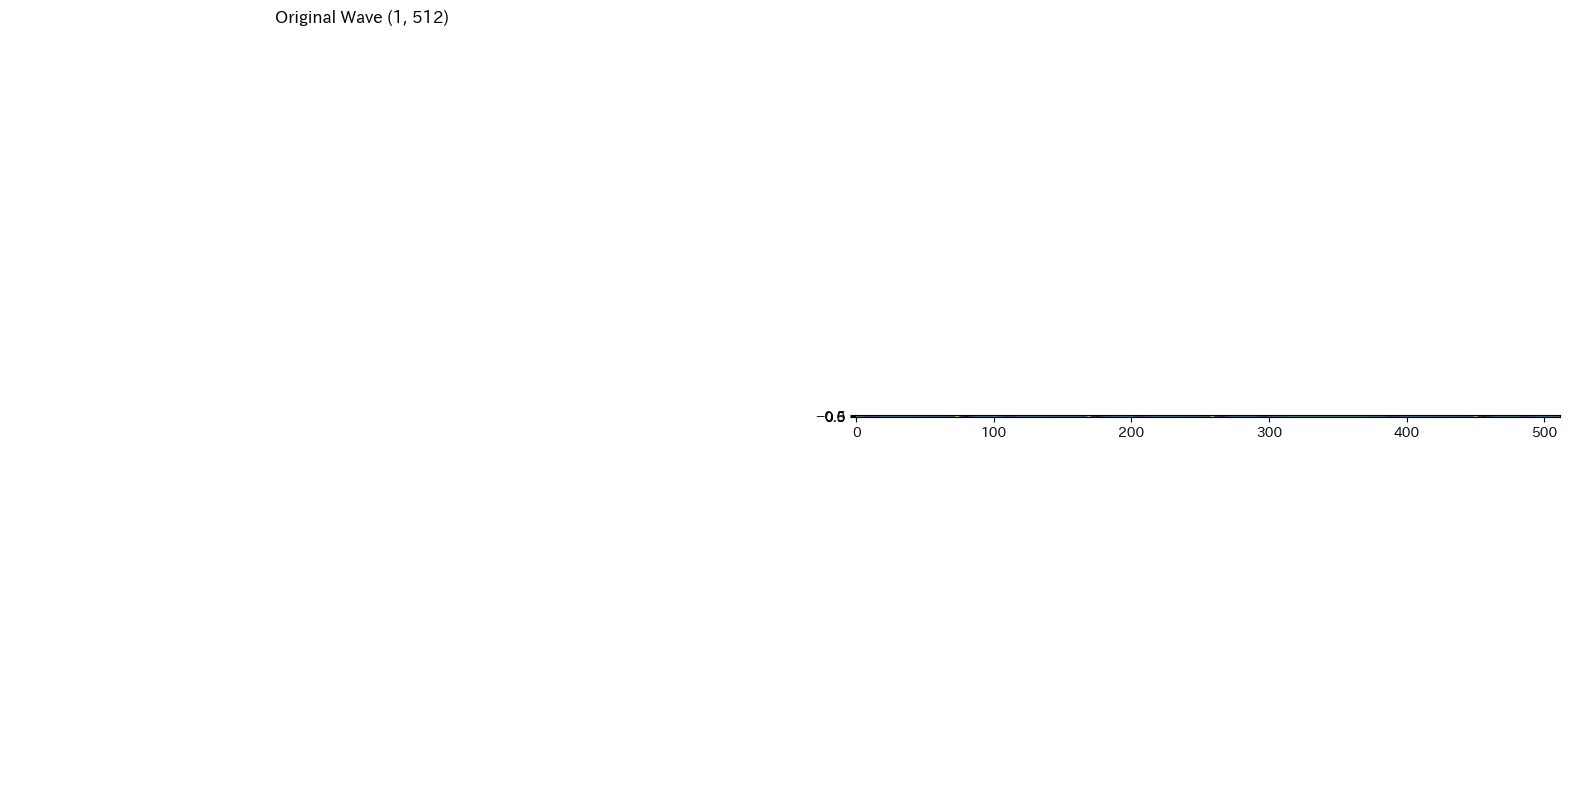

In [13]:
# データ処理
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import audiomentations as A

def show_wave_transform(wave_path, transform):

    data = np.load(wave_path)
    print(data.shape)
    # 512 -> (1, 512)
    data = data.reshape(1, -1)

    # PIL 画像を numpy 配列に変換
    # image_np = np.array(image)
    print(f"Original Wave Shape: {data.shape}")

    # 変換を適用
    transformed_data = transform(samples = data, sample_rate=128)

    # 元の画像と変換後の画像を並べて表示
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # オリジナル画像の表示
    axes[0].plot(data)
    axes[0].set_title(f"Original Wave {data.shape}")
    axes[0].axis('off')

    # 変換後の画像の表示# データ処理
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

def visualization_wave_dataset(df_dataset_path):

    df = pd.read_csv(df_dataset_path)
    # df = df[df['cv'] == 1.0]
    # plt.figure(figsize=(12, 90))
    for index, row in df.iterrows():
        # break
        ecg_path = row['ecg_path_preprocessed']
        ppg_path = row['ppg_path_preprocessed']

        real_ecg = np.load(ecg_path)
        real_ppg = np.load(ppg_path)

        # print
        # print(f"{i}")
        plt.figure(figsize=(5, 2))  # 図のサイズを設定
        # plt.subplot(20, 1, i+1) # 5
        plt.plot(3 * real_ecg, label='Real ECG')
        # plt.plot(fake_ecg, label='Fake ECG')
        # plt.plot(fake_ecg[i][:1000], label='Fake ECG')
        plt.plot(real_ppg, label='Real PPG')
        # plt.title(f'Waveform Comparison {i+1}')
        plt.title(f'ID: {os.path.basename(ecg_path)}')
        plt.xlabel('Frame')
        plt.ylabel('Amplitude')
        plt.ylim(-1, 1)  # y軸を固定
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


path = '/content/drive/MyDrive/MatsuoLab/SLab/data/preprocessed_wesad.csv'
visualization_wave_dataset(path)
    axes[1].plot(transformed_data)
    axes[1].set_title("Transformed Image: " + ', '.join([t.__class__.__name__ for t in transform.transforms]))
    axes[1].axis('off')

    # 両方の画像を表示
    plt.tight_layout()
    plt.show()


wave_path = '/content/drive/MyDrive/MatsuoLab/SLab/data/preprocessed_all_data/ecg_1_stable_13312.npy'


# データ拡張のパイプラインを定義
transform = A.TimeMask(
    min_band_part=0.1,
    max_band_part=0.15,
    fade=True,
    p=1.0,
    )


# データ拡張を確認
show_wave_transform(wave_path, transform)

